# 1. import library
mengimpor beberapa pustaka (library) Python yang dibutuhkan

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler, LabelEncoder
from matplotlib.colors import ListedColormap
from sklearn.feature_selection import RFE , f_regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import f1_score
import joblib

In [59]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer, Reshape


In [62]:
# Load data
import math


df_train = pd.read_csv('dataset/Training.csv')
df_test = pd.read_csv('dataset/Testing.csv')
df = pd.concat([df_train, df_test], ignore_index=True)

# Replace zero with NaN in some columns
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_to_replace] = df[cols_to_replace].replace(0, np.nan)
df.dropna(inplace=True)

# Feature and label
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Log transform
cols_to_log = ["Insulin", "DiabetesPedigreeFunction", "Age", "Pregnancies"]
for col in cols_to_log:
    X[col] = np.log1p(X[col])

# Scaling
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for CNN: (samples, height, width, channels)
n_features = X.shape[1]
target_size = math.ceil(np.sqrt(n_features)) ** 2  # cari kuadrat sempurna terdekat
padding_needed = target_size - n_features

# Tambahkan kolom dummy
for i in range(padding_needed):
    X[f'dummy_{i}'] = 0

# Normalisasi & reshape
X_scaled = scaler.fit_transform(X)
side_len = int(math.sqrt(target_size))  # sisi matriks (misal 3 utk 9 fitur)
X_reshaped = X_scaled.reshape(-1, side_len, side_len, 1)
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# Build CNN model
model = Sequential([
    InputLayer(input_shape=(side_len, side_len, 1)),
    Conv2D(32, kernel_size=(2, 2), activation='relu'),
    MaxPooling2D(pool_size=(1, 1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.2)

# Evaluate model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print("Akurasi:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Epoch 1/20
57/57 [==============================] - 1s 5ms/step - loss: 0.5944 - accuracy: 0.6959 - val_loss: 0.4670 - val_accuracy: 0.7456
Epoch 2/20
57/57 [==============================] - 0s 3ms/step - loss: 0.4889 - accuracy: 0.7607 - val_loss: 0.4214 - val_accuracy: 0.7588
Epoch 3/20
57/57 [==============================] - 0s 2ms/step - loss: 0.4749 - accuracy: 0.7728 - val_loss: 0.4094 - val_accuracy: 0.7851
Epoch 4/20
57/57 [==============================] - 0s 2ms/step - loss: 0.4512 - accuracy: 0.7870 - val_loss: 0.4013 - val_accuracy: 0.7851
Epoch 5/20
57/57 [==============================] - 0s 2ms/step - loss: 0.4456 - accuracy: 0.7980 - val_loss: 0.3875 - val_accuracy: 0.7895
Epoch 6/20
57/57 [==============================] - 0s 2ms/step - loss: 0.4324 - accuracy: 0.7914 - val_loss: 0.3844 - val_accuracy: 0.8114
Epoch 7/20
57/57 [==============================] - 0s 2ms/step - loss: 0.4164 - accuracy: 0.8046 - val_loss: 0.3776 - val_accuracy: 0.8202
Epoch 8/20
57/57 [==

In [70]:
from tensorflow.keras.models import load_model

# Data input
user_input = pd.DataFrame([
    {'Pregnancies': 3, 'Glucose': 78, 'BloodPressure': 50, 'SkinThickness': 32, 'Insulin': 88, 'BMI': 31.0, 'DiabetesPedigreeFunction': 0.848, 'Age': 26},
    {'Pregnancies': 4, 'Glucose': 180, 'BloodPressure': 85, 'SkinThickness': 29, 'Insulin': 150, 'BMI': 34.3, 'DiabetesPedigreeFunction': 1.2, 'Age': 33},
])

# Transform log
cols_to_log = ["Insulin", "DiabetesPedigreeFunction", "Age", "Pregnancies"]
for col in cols_to_log:
    user_input[col] = np.log1p(user_input[col])

# Tambahkan dummy column agar jumlah fitur = 9 (sama seperti saat training)
user_input['dummy_0'] = 0

# Urutkan kolom agar sesuai dengan training
ordered_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                   'BMI', 'DiabetesPedigreeFunction', 'Age', 'dummy_0']
user_input = user_input[ordered_columns]

# Scaling
user_input_scaled = scaler.transform(user_input)

# Reshape ke format CNN
user_input_reshaped = user_input_scaled.reshape(-1, 3, 3, 1)

# Load dan prediksi

predictions = model.predict(user_input_reshaped)

# Tampilkan hasil
for i, p in enumerate(predictions):
    print(f"Data ke-{i+1} -> Probabilitas Diabetes: {p[0]*100:.2f}%")


1/1 [==============================] - 0s 25ms/step
Data ke-1 -> Probabilitas Diabetes: 28.44%
Data ke-2 -> Probabilitas Diabetes: 99.22%


# 2. load dataset dan analisis dataset
membaca dataset dari folder yang sudah didownload

In [27]:
# https://www.kaggle.com/datasets/ehababoelnaga/diabetes-dataset/data
df_train = pd.read_csv('dataset/Training.csv')
df_test = pd.read_csv('dataset/Testing.csv')
df_eksternal = pd.read_csv('dataset/data2.csv')
df_temp = pd.concat([df_train, df_test], ignore_index=True)

df_combined = pd.concat([df_temp, df_eksternal], ignore_index=True)

In [28]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3536 entries, 0 to 3535
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               3536 non-null   int64  
 1   Glucose                   3536 non-null   int64  
 2   BloodPressure             3536 non-null   int64  
 3   SkinThickness             3536 non-null   int64  
 4   Insulin                   3536 non-null   int64  
 5   BMI                       3536 non-null   float64
 6   DiabetesPedigreeFunction  3536 non-null   float64
 7   Age                       3536 non-null   int64  
 8   Outcome                   3536 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 248.8 KB


bentuk dataset tidak ada yang berbentuk object, sehingga tidak perlu ada perubahan data


Dataset Features:
    Pregnancies:	Jumlah kehamilan

    Glucose	Kadar: glukosa darah

    BloodPressure:	Tekanan darah diastolik

    SkinThickness:	Ketebalan lipatan kulit triceps

    Insulin:	Kadar insulin

    BMI:	Body Mass Index

    DiabetesPedigreeFunction:	Riwayat diabetes dalam keluarga

    Age:	Umur

    Outcome:	0 = tidak diabetes, 1 = diabetes


In [29]:
df_combined.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,3536.000000,3536.000000,3536.000000,3536.000000,3536.000000,3536.000000,3536.000000,3536.000000,3536.000000
mean,3.827489,121.307410,69.007636,20.546663,79.841629,31.980062,0.483149,32.992081,0.373586
std,3.319002,31.772231,19.179011,15.815076,115.550183,7.786438,0.351909,11.449487,0.483824
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.200000,0.247000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.050000,0.380000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,129.000000,36.500000,0.640000,40.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


| Kolom           | Min | Penjelasan                                                                                         |
| --------------- | --- | -------------------------------------------------------------------------------------------------- |
| `Glucose`       | 0.0 | ⚠️ Tidak mungkin kadar gula darah (glukosa) seseorang benar-benar 0.                               |
| `BloodPressure` | 0.0 | ⚠️ Tekanan darah 0 menunjukkan seseorang tidak hidup — ini tidak realistis.                        |
| `SkinThickness` | 0.0 | ⚠️ Pengukuran tebal kulit 0 bisa terjadi jika tidak diukur, tapi ini seharusnya **missing value**. |
| `Insulin`       | 0.0 | ⚠️ Sangat kecil kemungkinan insulin = 0 pada manusia sehat, bisa jadi data tidak tersedia.         |
| `BMI`           | 0.0 | ⚠️ Tidak mungkin seseorang memiliki BMI 0.                                                         |




In [30]:
# Ganti 0 dengan NaN di kolom yang tidak boleh bernilai 0
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df_combined[cols_to_replace] = df_combined[cols_to_replace].replace(0, np.nan)
print(df_combined.isnull().sum())

Pregnancies                    0
Glucose                       23
BloodPressure                163
SkinThickness               1037
Insulin                     1707
BMI                           46
DiabetesPedigreeFunction       0
Age                            0
Outcome                        0
dtype: int64


| Glucose| BloodPressure| SkinThickness| Insulin| BMI|
|------------|------------|------------|------------|---------------------------------------------- |
| 18|128|810|1333|35|

missing values yang dikodekan sebagai 0, maka solusi dibuat adalah adalah ubah semua nilai 0 yang tidak valid menjadi NaN.

In [31]:
df_cleaned = df_combined.interpolate(method='linear', limit_direction='both')
print(df_cleaned.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [32]:
df = df_cleaned
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3536 entries, 0 to 3535
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               3536 non-null   int64  
 1   Glucose                   3536 non-null   float64
 2   BloodPressure             3536 non-null   float64
 3   SkinThickness             3536 non-null   float64
 4   Insulin                   3536 non-null   float64
 5   BMI                       3536 non-null   float64
 6   DiabetesPedigreeFunction  3536 non-null   float64
 7   Age                       3536 non-null   int64  
 8   Outcome                   3536 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 248.8 KB


data yang sebelumnya 0 sudah dihapus, data tersisa 1424 kolom (sebelumnya 2768)

In [33]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,94.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,94.0,26.6,0.351,31,0
2,8,183.0,64.0,26.0,94.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
3531,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
3532,2,122.0,70.0,27.0,146.0,36.8,0.340,27,0
3533,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
3534,1,126.0,60.0,27.0,112.0,30.1,0.349,47,1


In [34]:
# def bmi_category(bmi):
#     if bmi < 18.5:
#         return 'Underweight'
#     elif 18.5 <= bmi <= 24.9:
#         return 'Healthy Weight'
#     elif 25.0 <= bmi <= 29.9:
#         return 'Overweight'
#     else:
#         return 'Obesity'

# df['BMI_Category'] = df['BMI'].apply(bmi_category)

# bmi_counts = df['BMI_Category'].value_counts()

# plt.figure(figsize=(8, 5))
# sns.barplot(x=bmi_counts.index, y=bmi_counts.values, palette='pastel')
# plt.title('Distribusi Kategori BMI')
# plt.xlabel('Kategori BMI')
# plt.ylabel('Jumlah')
# plt.xticks(rotation=15)
# plt.tight_layout()
# plt.show()plt.figure(figsize=(6, 6))
# plt.pie(bmi_counts.values, labels=bmi_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
# plt.title('Distribusi Persentase Kategori BMI')
# plt.show()

In [35]:
# plt.figure(figsize=(6, 6))
# plt.pie(bmi_counts.values, labels=bmi_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
# plt.title('Distribusi Persentase Kategori BMI')
# plt.show()

In [36]:

# def age_group(age):
#     if age < 20:
#         return 'Teen'
#     elif 20 <= age < 30:
#         return 'Young Adult'
#     elif 30 <= age < 50:
#         return 'Adult'
#     else:
#         return 'Senior'

# df['Age_Group'] = df['Age'].apply(age_group)

# age_counts = df['Age_Group'].value_counts()

# # Bar plot
# plt.figure(figsize=(8, 5))
# sns.barplot(x=age_counts.index, y=age_counts.values, palette='pastel')
# plt.title('Distribusi Kelompok Usia')
# plt.xlabel('Kelompok Usia')
# plt.ylabel('Jumlah')
# plt.tight_layout()
# plt.show()


In [37]:
# outcome_counts = df['Outcome'].value_counts()

# # Buat bar chart
# plt.figure(figsize=(6, 4))
# sns.barplot(x=outcome_counts.index, y=outcome_counts.values, palette='Set2')
# plt.title('Distribusi Outcome')
# plt.xlabel('Outcome (0 = Non-Diabetes, 1 = Diabetes)')
# plt.ylabel('Jumlah')
# plt.xticks([0, 1], ['Non-Diabetes', 'Diabetes'])
# plt.tight_layout()
# plt.show()

Kolom numerik yang akan divisualisasikan: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


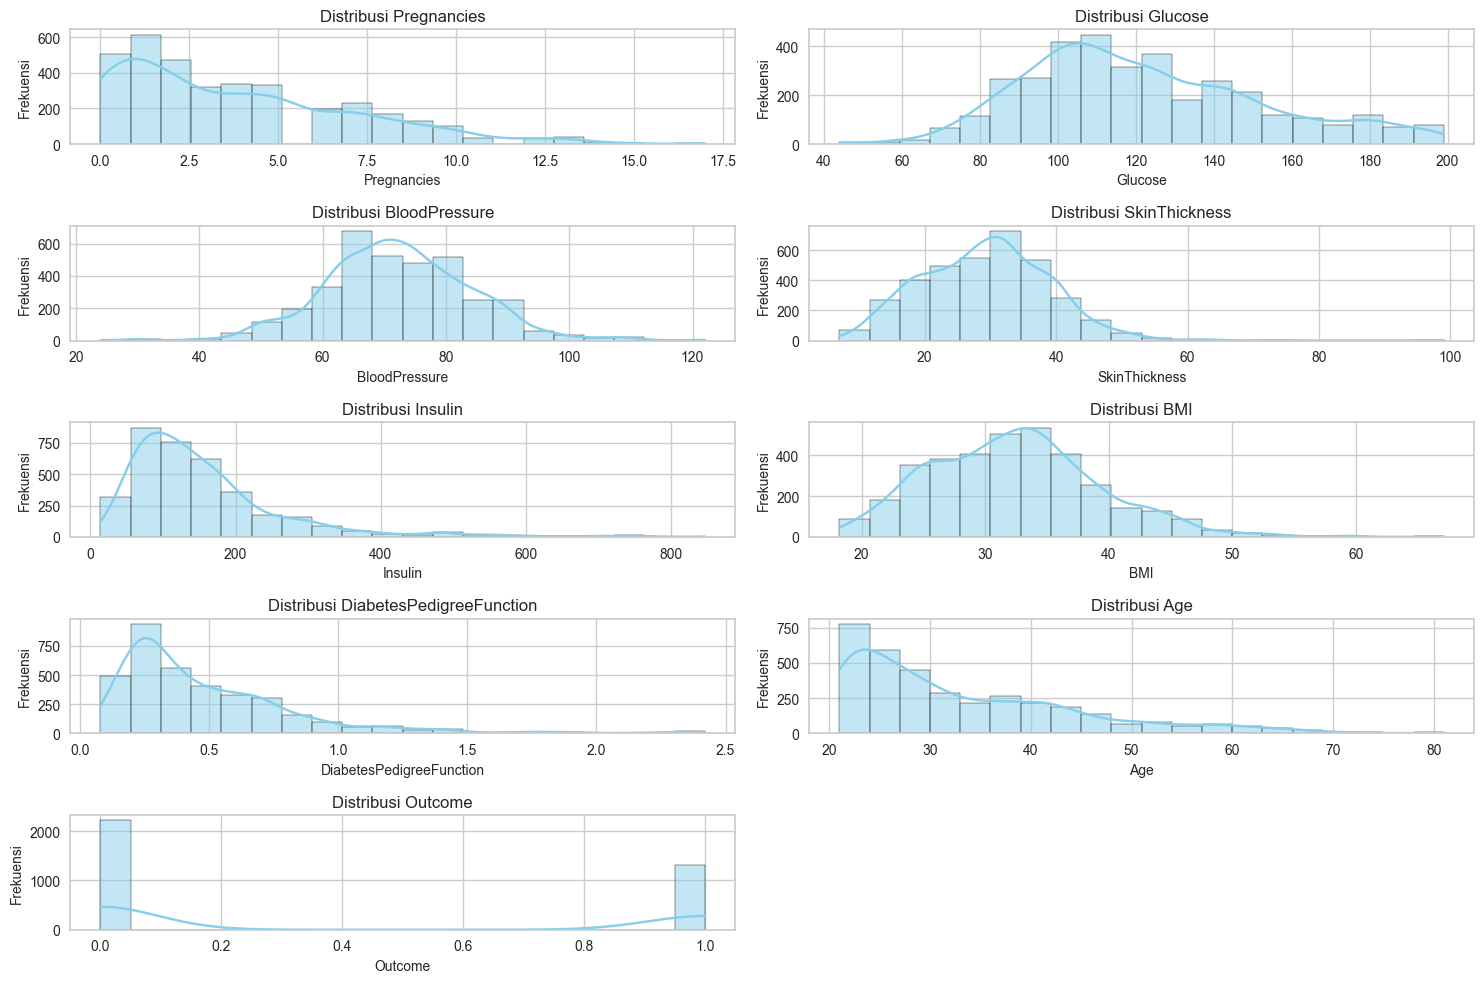

In [38]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(f"Kolom numerik yang akan divisualisasikan: {numeric_cols}")

plt.figure(figsize=(15, 10))
n_cols = len(numeric_cols)
n_rows = (n_cols + 1) // 2

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, 2, i)
    sns.histplot(df[col], bins=20, kde=True, color='skyblue')
    plt.title(f'Distribusi {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frekuensi', fontsize=10)

plt.tight_layout()
plt.show()

hasil dari visualisasi bahwa distribusi data tidak mewajibkan distribusi normal karena saya memakai linear regresi sebagai model klasifikasi

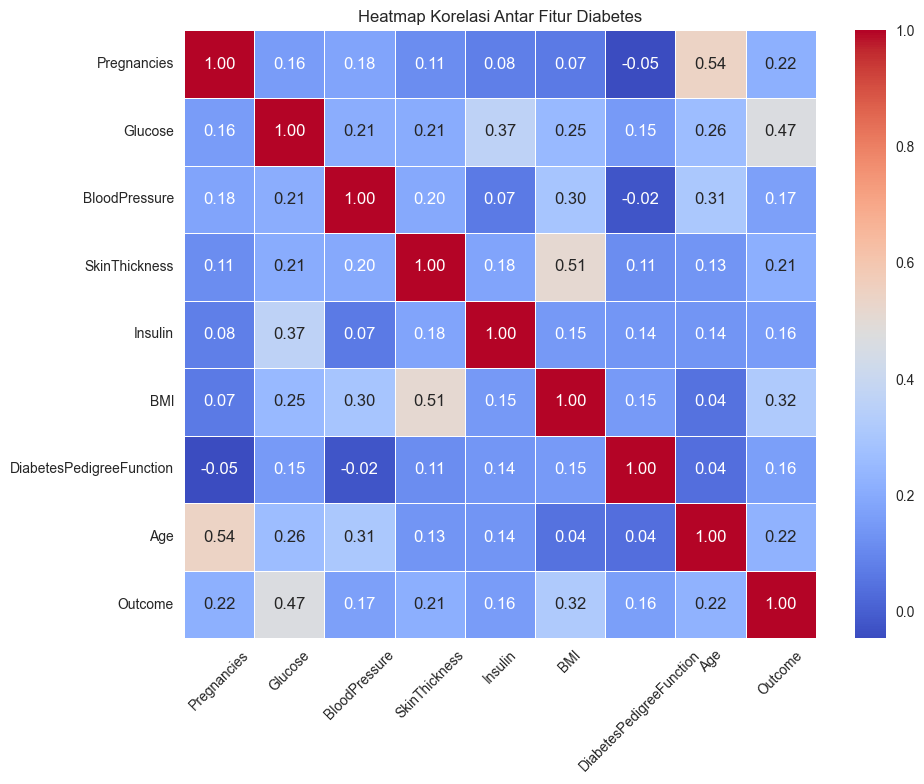

In [39]:
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Antar Fitur Diabetes')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Fitur yang paling berkorelasi dengan Outcome (label diabetes):

    - Glucose (0.48) → Korelasi positif sedang → makin tinggi kadar glukosa, makin besar kemungkinan diabetes.

    - Age (0.33) → Korelasi positif → makin tua usia, makin besar kemungkinan diabetes.

    - BMI (0.29) → Korelasi positif → makin tinggi BMI, makin besar kemungkinan diabetes.

    - SkinThickness & Insulin juga memiliki korelasi lemah (sekitar 0.27-0.29).

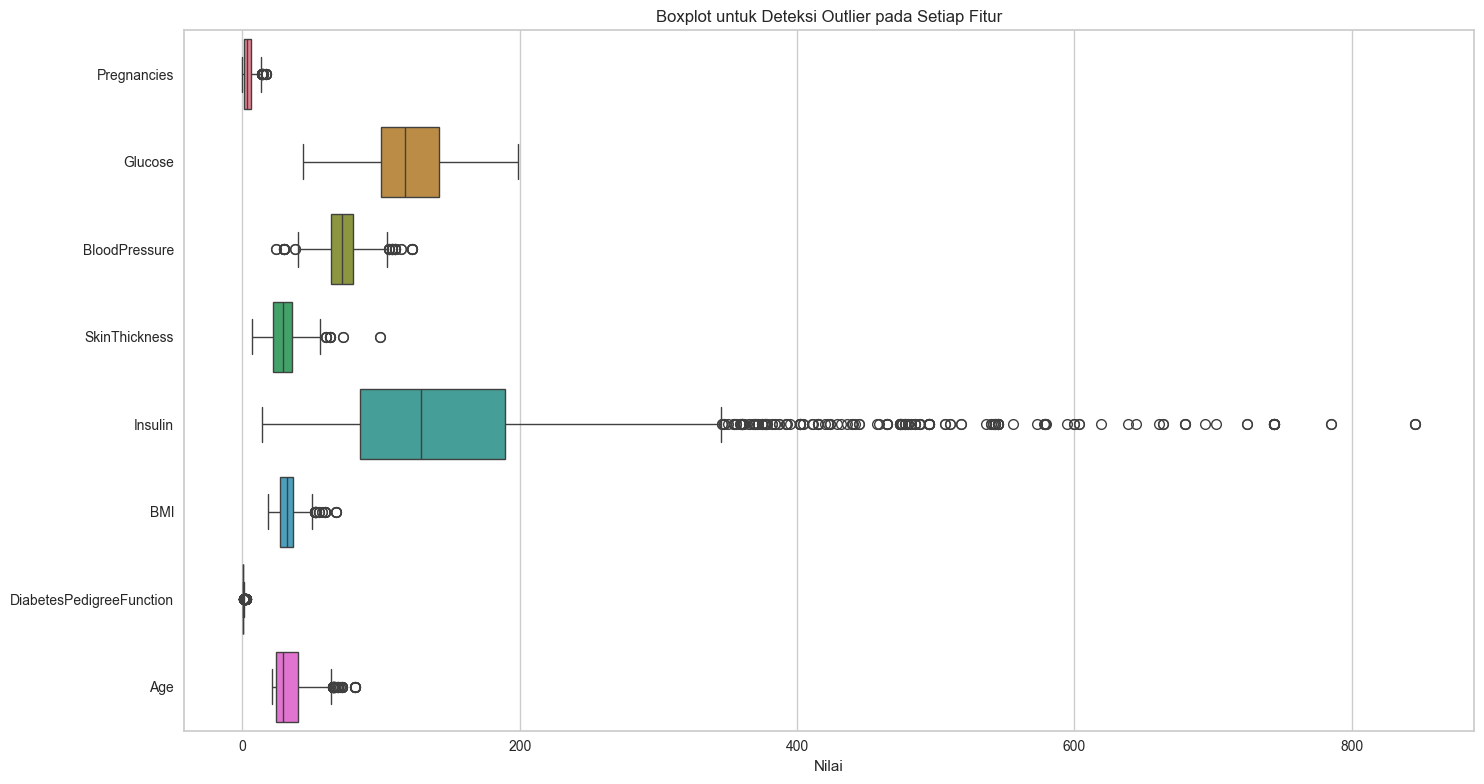

In [49]:
import matplotlib.pyplot as plt

# Misalnya df adalah DataFrame kamu (sudah di-load sebelumnya)
# df = pd.read_csv('nama_file.csv')  # jika dari CSV

# Hapus kolom target jika hanya ingin fitur numerik
df_features = df.drop("Outcome", axis=1)

# Set ukuran figure
plt.figure(figsize=(15, 8))

# Buat boxplot untuk semua fitur
sns.boxplot(data=df_features, orient="h")

# Judul
plt.title("Boxplot untuk Deteksi Outlier pada Setiap Fitur")
plt.xlabel("Nilai")

# Tampilkan plot
plt.tight_layout()
plt.show()

In [41]:
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    mask = ~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)
    return data[mask]

fungsi untuk mengapus outlier menggunakan rumus iqr

In [42]:
# Normalisasi data utk outlier
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
data_clean = remove_outliers_iqr(pd.concat([X, y], axis=1))

# Pisahkan kembali
X_clean = data_clean.drop("Outcome", axis=1)
y_clean = data_clean["Outcome"]
X_log = X_clean.copy()
cols_to_log = ["Insulin", "DiabetesPedigreeFunction", "Age", "Pregnancies"]

for col in cols_to_log:
    X_log[col] = np.log1p(X_log[col])

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_log)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_clean, test_size=0.2, random_state=42
)




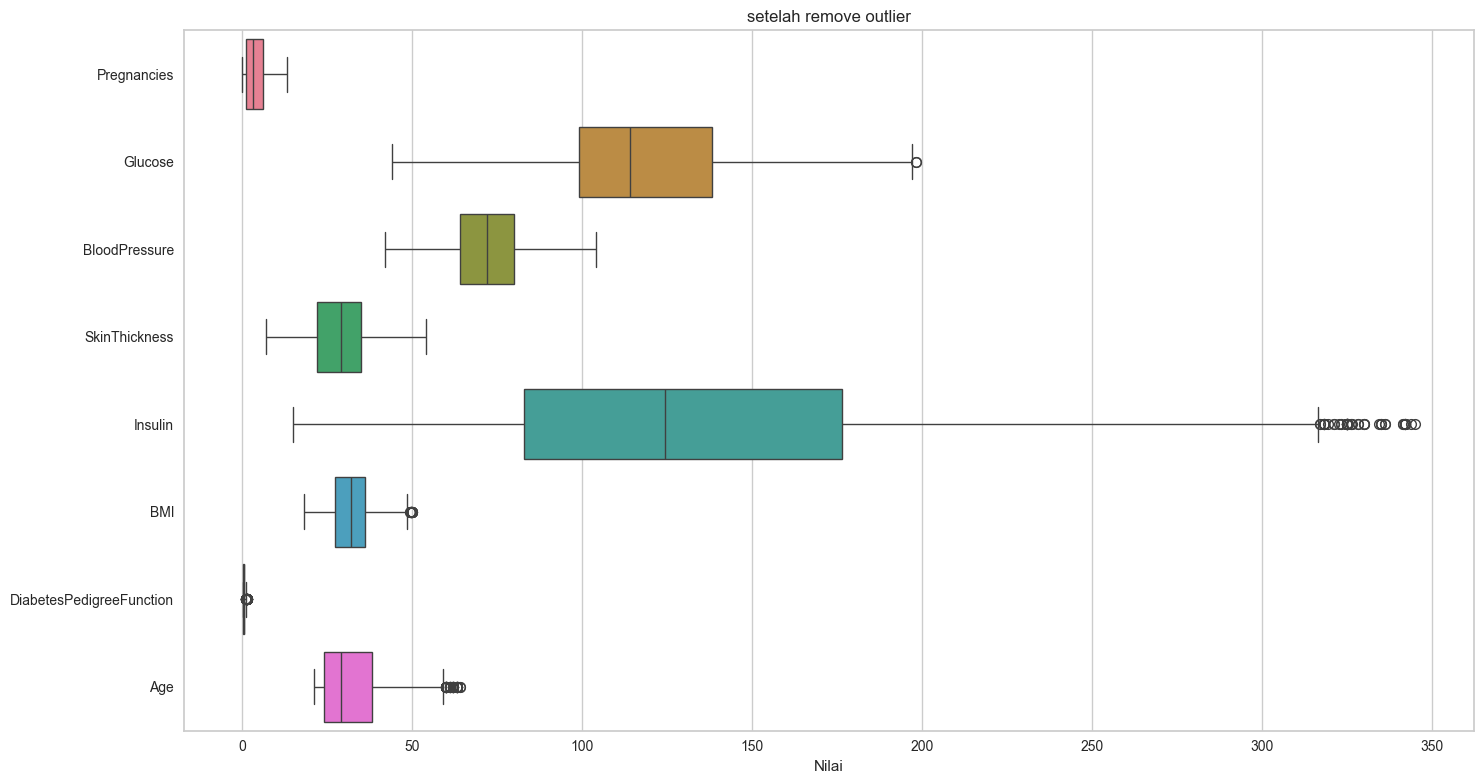

In [50]:

df_features = data_clean.drop("Outcome", axis=1)
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_features, orient="h")

plt.title("setelah remove outlier")
plt.xlabel("Nilai")

plt.tight_layout()
plt.show()

In [44]:

# Sebelum SMOTE
print("Distribusi sebelum SMOTE:", Counter(y_train))

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Terapkan SMOTE ke data latih
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Setelah SMOTE
print("Distribusi setelah SMOTE:", Counter(y_train_smote))

Distribusi sebelum SMOTE: Counter({0: 1573, 1: 884})
Distribusi setelah SMOTE: Counter({0: 1573, 1: 1573})


data di normalisasi untuk outlier dan data di split 80% train dan 20% test

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Definisikan semua model dalam dictionary
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Fit semua model
fitted_models = {}
for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    fitted_models[name] = model


traning menggunakan model logistic regression


==== Evaluasi: Logistic Regression ====
Akurasi: 0.7480
AUC Score: 0.8562
Confusion Matrix:
[[309 103]
 [ 52 151]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       412
           1       0.59      0.74      0.66       203

    accuracy                           0.75       615
   macro avg       0.73      0.75      0.73       615
weighted avg       0.77      0.75      0.75       615


==== Evaluasi: Decision Tree ====
Akurasi: 0.9659
AUC Score: 0.9633
Confusion Matrix:
[[400  12]
 [  9 194]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       412
           1       0.94      0.96      0.95       203

    accuracy                           0.97       615
   macro avg       0.96      0.96      0.96       615
weighted avg       0.97      0.97      0.97       615


==== Evaluasi: Random Forest ====
Akurasi: 0.9935
AUC Score: 0.9996
Confu

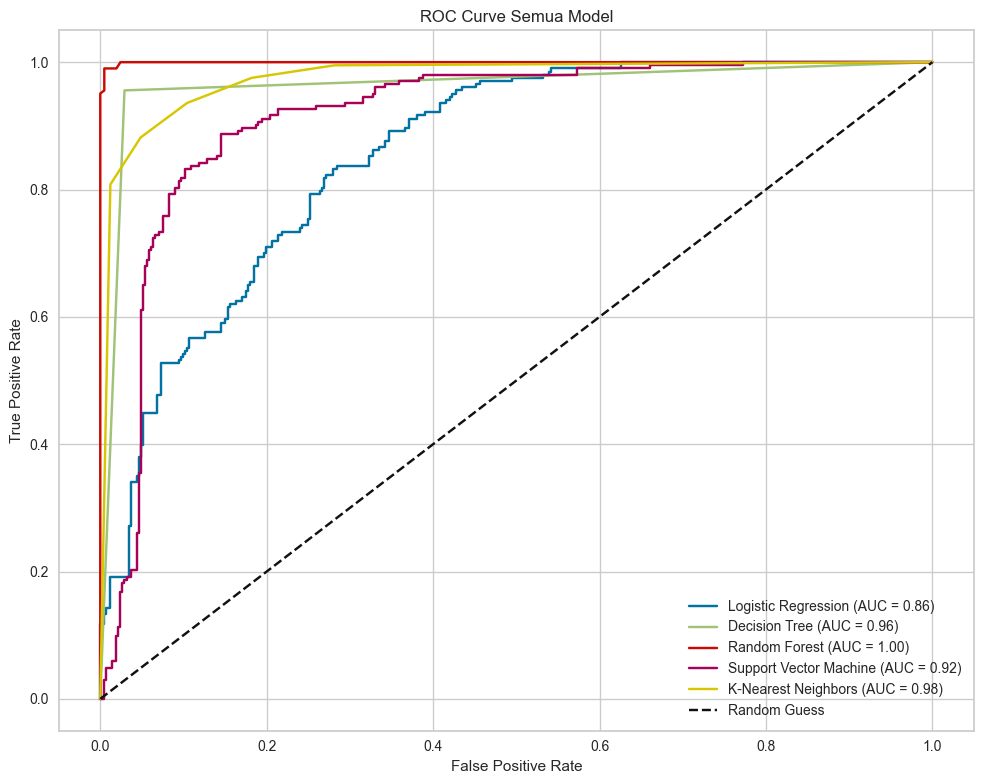

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Evaluasi semua model yang telah dilatih
for name, model in fitted_models.items():
    print(f"\n==== Evaluasi: {name} ====")
    y_pred = model.predict(X_test)

    # Cek apakah model punya predict_proba (tidak semua model punya)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]  # Probabilitas kelas 1
    else:
        # Untuk SVC (default), gunakan decision_function
        y_proba = model.decision_function(X_test)

    # Hitung ROC dan AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)

    # Print evaluasi numerik
    print(f"Akurasi: {accuracy_score(y_test, y_pred):.4f}")
    print(f"AUC Score: {auc_score:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

# Finalisasi plot ROC curve
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Semua Model')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

152: Benar prediksi tidak diabetes (True Negative)

33: Benar prediksi diabetes (True Positive)

7: Salah prediksi menjadi diabetes padahal tidak (False Positive)

44: Salah prediksi tidak diabetes padahal sebenarnya diabetes (False Negative)

Kelas 0 (Tidak Diabetes):

    Precision: 0.78 → 78% dari prediksi "tidak diabetes" benar.

    Recall: 0.96 → Hampir semua yang benar-benar tidak diabetes berhasil dikenali.

    F1-Score: 0.86 → Keseimbangan precision & recall cukup baik.

Kelas 1 (Diabetes):

    Precision: 0.82 → 82% dari prediksi "diabetes" benar.

    Recall: 0.43 → Hanya 43% kasus diabetes yang berhasil terdeteksi (rendah).

    F1-Score: 0.56 → Kinerja untuk deteksi diabetes masih kurang optimal.

In [47]:

joblib.dump(scaler, 'saved_model/robust_scaler.pkl')
joblib.dump(model, 'saved_model/logreg_model.pkl')


['saved_model/logreg_model.pkl']

In [ ]:
scaler = joblib.load("saved_model/robust_scaler.pkl")
model = joblib.load("saved_model/logreg_model.pkl")
user_input = pd.DataFrame([
    {'Pregnancies': 3, 'Glucose': 78, 'BloodPressure': 50, 'SkinThickness': 32, 'Insulin': 88, 'BMI': 31.0, 'DiabetesPedigreeFunction': 0.848, 'Age': 26},
    {'Pregnancies': 1, 'Glucose': 165, 'BloodPressure': 69, 'SkinThickness': 8,  'Insulin': 68, 'BMI': 23.9, 'DiabetesPedigreeFunction': 0.66,  'Age': 22},
    {'Pregnancies': 5, 'Glucose': 115, 'BloodPressure': 72, 'SkinThickness': 35, 'Insulin': 130, 'BMI': 36.2, 'DiabetesPedigreeFunction': 0.35, 'Age': 40},
    {'Pregnancies': 0, 'Glucose': 92, 'BloodPressure': 60, 'SkinThickness': 28, 'Insulin': 0,  'BMI': 28.5, 'DiabetesPedigreeFunction': 0.2,   'Age': 19},
    {'Pregnancies': 4, 'Glucose': 180, 'BloodPressure': 85, 'SkinThickness': 29, 'Insulin': 150, 'BMI': 34.3, 'DiabetesPedigreeFunction': 1.2, 'Age': 33},
])

# Transformasi log untuk beberapa kolom
cols_to_log = ["Insulin", "DiabetesPedigreeFunction", "Age", "Pregnancies"]
for col in cols_to_log:
    user_input[col] = np.log1p(user_input[col])
user_input_scaled = scaler.transform(user_input)
probs = model.predict_proba(user_input_scaled)

for i, p in enumerate(probs):
    print(f"Data ke-{i+1} -> Probabilitas Tidak Diabetes (0): {p[0]*100:.2f}%, Diabetes (1): {p[1]*100:.2f}%")


Data ke-1 -> Probabilitas Tidak Diabetes (0): 100.00%, Diabetes (1): 0.00%
Data ke-2 -> Probabilitas Tidak Diabetes (0): 40.00%, Diabetes (1): 60.00%
Data ke-3 -> Probabilitas Tidak Diabetes (0): 0.00%, Diabetes (1): 100.00%
Data ke-4 -> Probabilitas Tidak Diabetes (0): 100.00%, Diabetes (1): 0.00%
Data ke-5 -> Probabilitas Tidak Diabetes (0): 100.00%, Diabetes (1): 0.00%


mencoba memasukan input baru, dan hasilnya sangat menjanjikan